# Análise de dados: Compra de carros

Este é um projeto de machine learning para análise de dados de vendas de carros, com informações de clientes e valores pagos pelos veículos, os dados foram disponibilizados na plataforma [Kaggle](https://www.kaggle.com/datasets/dev0914sharma/car-purchasing-model).

O caso proposto e o problema a ser solucionado:
_"Você está trabalhando como cientista de dados em uma empresa automobilística.
Você gostaria de desenvolver um modelo para prever o valor total que os clientes estão dispostos a pagar pelo carro novo. Essas informações serão utilizadas pela empresa para fazer o marketing direcionado com base no perfil do cliente."_

Sobre o conjunto de dados:
_"Este arquivo contém as informações das várias pessoas com os seguintes detalhes que podem nos ajudar a descobrir a melhor previsão e também nos ajudar a treinar nosso modelo para prever o valor correto e obter um bom F1 Score."_

## Demanda da análise

- Analisar a correlação dos dados dos clientes com os valores de compra de carros.
- Gerar um modelo preditivo para o valor que um cliente está disposto a pagar por um carro novo.
- Simular novas entradas de dados e previsão de valor a pagra por um carro novo.

## Tópicos da análise

1. Análise das medidas estatísticas dos dados
2. Distribuição dos dados entre as variáveis independentes (features) e dependente (target)
3. Correlação entre as variáveis
4. Criação do modelo de regressão linear múltipla
   1. Separação dos dados de treino e teste 
   2. Treinamento do modelo
   3. Predições do modelo com dados de teste
   4. Resíduo, diferença entre dados de teste e dados previstos
   5. Métricas de performance
   6. Previsões com novos dados


## Importação de pacotes


In [1]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from tabulate import tabulate

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')


## Carregamento dos dados


In [2]:
# Efetuando limpeza de memória antes do carregamento de dados
gc.collect()

# Caminho do arquivo csv
csv = 'dados/Car_Purchasing_Data.csv'

# Criando um dataframe a partir do arquivo csv no diretório dados
df = pd.read_csv(csv, encoding='utf-8', sep=',')


## Detalhes do dataframe


In [3]:
# Informações do dataset como nome das colunas, contagem de linhas,
# tipo de dados e memória utilizada

df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 128.3 KB


In [4]:
# Renomeando as colunas

print("\nNomes originais das colunas\n\n", df.columns.to_list())

df.rename(columns={'Customer Name': 'nome_cliente',
                   'Customer e-mail': 'email_cliente',
                   'Country': 'pais',
                   'Gender': 'genero',
                   'Age': 'idade',
                   'Annual Salary': 'salario_anual',
                   'Credit Card Debt': 'divida_cartao_credito',
                   'Net Worth': 'patrimonio_liquido',
                   'Car Purchase Amount': 'valor_compra_carro'},
          inplace=True)

print("\nNovos nomes das colunas\n\n", df.columns.to_list())



Nomes originais das colunas

 ['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth', 'Car Purchase Amount']

Novos nomes das colunas

 ['nome_cliente', 'email_cliente', 'pais', 'genero', 'idade', 'salario_anual', 'divida_cartao_credito', 'patrimonio_liquido', 'valor_compra_carro']


In [5]:
# Amostra de dados do dataframe

df.sample(10)


,nome_cliente,email_cliente,pais,genero,idade,salario_anual,divida_cartao_credito,patrimonio_liquido,valor_compra_carro
188,Malachi Henson,adipiscing.elit@Nunc.com,USA,1,53,72226.56030,5817.153854,623033.4820,60865.76396
129,Nolan Nixon,arcu@etultricesposuere.co.uk,USA,0,40,64328.27892,13860.438210,567357.0264,44001.20706
422,Reed,diam.nunc@lectusconvallisest.org,USA,1,38,74445.72702,7515.152476,297964.2638,40095.04980
21,Zelenia Byers,auctor.non@sapien.co.uk,USA,0,48,64347.34531,10905.366280,307226.0977,43402.31525
108,Lionel Mcclure,odio.auctor.vitae@placeratorcilacus.edu,USA,1,30,61922.89710,10366.503260,323453.2022,27586.71854
207,Nora X. Decker,non.enim@diam.org,USA,0,52,65446.65687,8491.586154,571564.7901,54850.38742
177,Phelan Montoya,magna.tellus.faucibus@etmalesuadafames.co.uk,USA,0,51,85186.48921,12413.031900,546630.5284,64545.16339
15,Thomas Williams,aliquet.molestie@ut.org,USA,1,53,64662.30061,11326.034340,481433.4324,53017.26723
23,Micah Wheeler,arcu.eu@tincidunt.org,USA,1,47,52027.63837,11960.853770,688466.0503,46635.49432
398,"Whitaker, Adena B.",pharetra.sed.hendrerit@accumsanneque.com,USA,0,48,62175.68945,12967.284000,343290.6770,42919.51960


In [6]:
# Quantidade de linhas e colunas

df.shape


(500, 9)

## Removendo colunas que não serão utilizadas


In [7]:
df = df.drop(columns=['nome_cliente', 'email_cliente', 'pais'])


## Verificando e tratando se necessário os valores únicos e/ou duplicados


In [8]:
# Identificando a quantidade de valores duplicados (True)

df.duplicated(keep='first').value_counts()


False    500
dtype: int64

In [9]:
# Verificando a quantidade de valores únicos

df.nunique()


genero                     2
idade                     43
salario_anual            500
divida_cartao_credito    500
patrimonio_liquido       500
valor_compra_carro       500
dtype: int64

In [10]:
# Verificando a quantidade dos valores únicos de colunas específicas

genero_qtde = pd.DataFrame(df['genero'].value_counts().sort_index())
genero_qtde = genero_qtde.T
print(genero_qtde)

idade_qtde = pd.DataFrame(df['idade'].value_counts().sort_index())
idade_qtde = idade_qtde.T
print('\n', idade_qtde)


          0    1
genero  247  253

        20  22  25  27  28  29  30  31  32  33  ...  57  58  59  60  61  62  \
idade   1   1   1   1   1   2   3   1   9  10  ...  17   7   6   5   5   5   

       63  64  65  70  
idade   6   1   1   2  

[1 rows x 43 columns]


## Verificando e tratando se necessário os tipos de valores


In [11]:
# Identificando os tipos de dados das colunas

df.dtypes


genero                     int64
idade                      int64
salario_anual            float64
divida_cartao_credito    float64
patrimonio_liquido       float64
valor_compra_carro       float64
dtype: object

## Verificando e tratando se necessário os valores nulos


In [12]:
# Identificando a quantidade de valores nulos

df.isnull().sum()


genero                   0
idade                    0
salario_anual            0
divida_cartao_credito    0
patrimonio_liquido       0
valor_compra_carro       0
dtype: int64

## Amostra de dados do dataframe


In [13]:
df.sample(10)


,genero,idade,salario_anual,divida_cartao_credito,patrimonio_liquido,valor_compra_carro
375,1,47,59205.89035,2689.317953,856287.15220,55700.83389
170,1,42,65714.46469,12557.081330,362707.02730,41026.02421
488,0,42,61575.95020,594.804949,497197.26400,41984.62412
371,0,40,60380.22868,2799.719601,508962.48740,39975.43302
160,1,57,72637.84482,14938.506130,352507.90120,57125.41541
68,1,57,48716.67271,10886.917110,662382.66230,52707.96816
483,0,43,76523.33258,10373.008560,620355.26580,55377.87697
173,1,54,81757.66856,7500.778414,278181.83540,57430.76903
266,1,40,53921.33351,9046.181090,515305.48410,37076.82508
166,1,36,52477.66494,12071.416840,97706.89181,20653.21409


## 1. Análise das medidas estatísticas dos dados


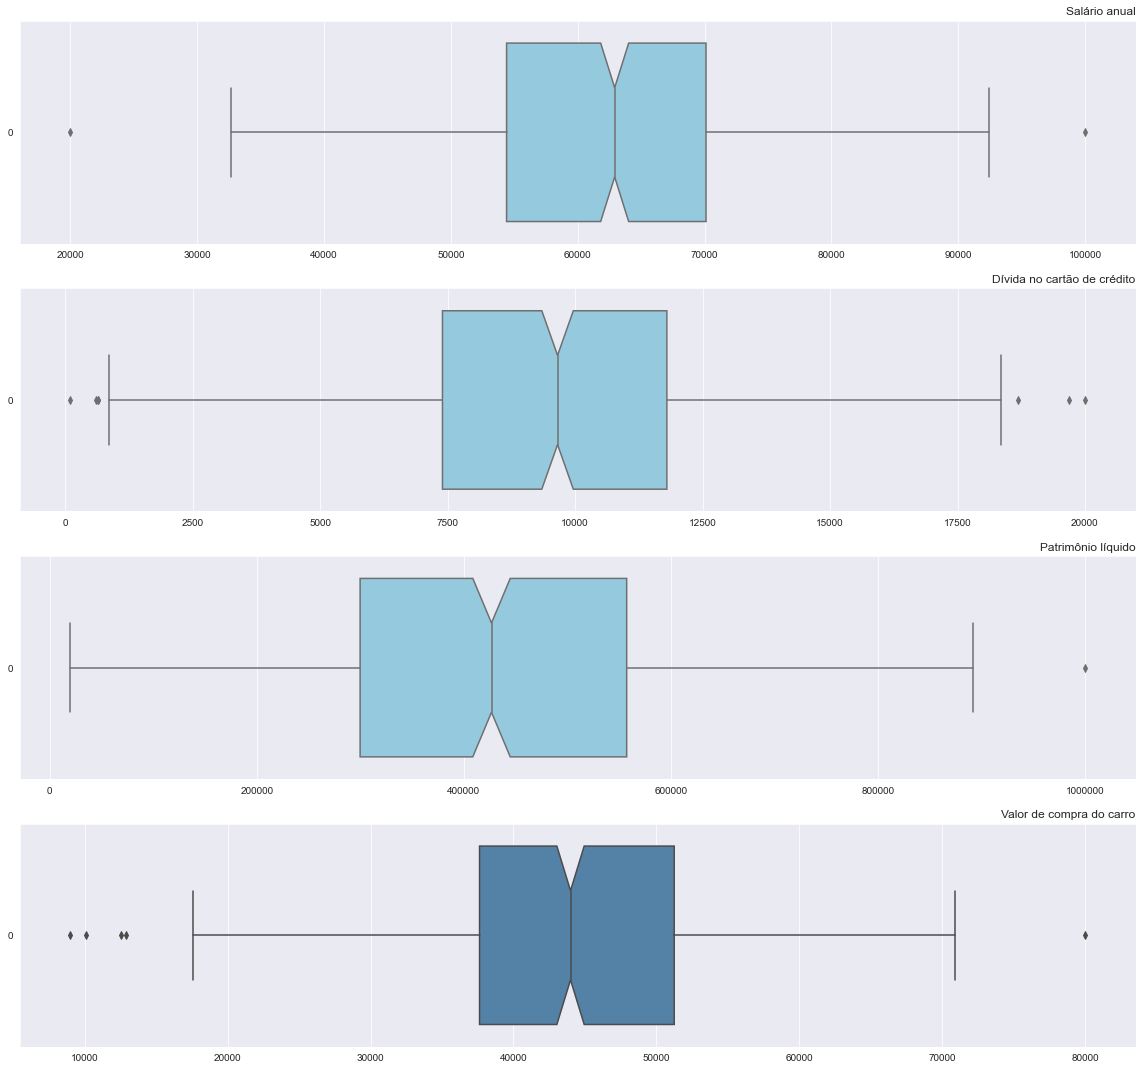

In [14]:
# Função para gerar gráficos boxplot
# param1: coluna do dataframe e coluna
# param2: label para gráfico
# param3: axis
# param3: cor, defaut: 'skyblue'

def graf_boxplot(param1, param2, param3, param4='skyblue'):
    sns.boxplot(data=param1, ax=param3, color=param4, notch=True, orient='h')
    param3.set(xlabel='', ylabel='')
    param3.tick_params(labelsize=10)
    param3.ticklabel_format(style='plain', axis='x')
    param3.set_title(param2, loc='right', fontsize=12)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(20, 15))

graf_boxplot(df['salario_anual'], 'Salário anual', ax1)
graf_boxplot(df['divida_cartao_credito'], 'Dívida no cartão de crédito', ax2)
graf_boxplot(df['patrimonio_liquido'], 'Patrimônio líquido', ax3)
graf_boxplot(df['valor_compra_carro'],
             'Valor de compra do carro', ax4, 'steelblue')

plt.subplots_adjust(top=1.9, bottom=0.95)
plt.show()


In [15]:
# Descrição dos dados estatísticos

df.describe()


,genero,idade,salario_anual,divida_cartao_credito,patrimonio_liquido,valor_compra_carro
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


## 2. Distribuição dos dados entre as variáveis independentes (features) e dependente (target)


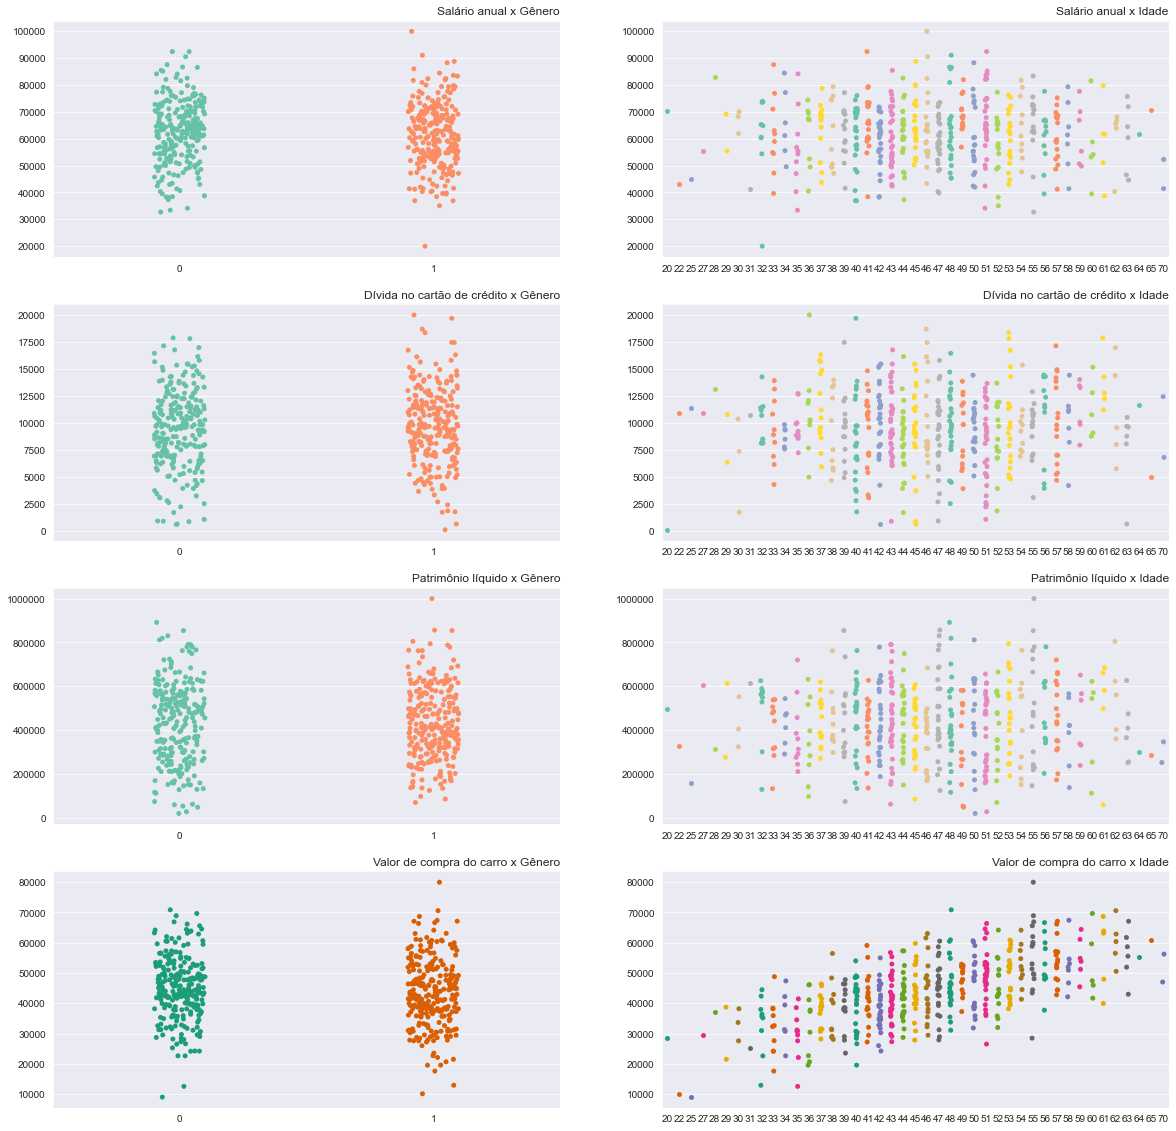

In [16]:
# Função para gerar gráficos stripplot
# param1: nome do dataframe
# param2: variável do eixo X
# param3: variável do eixo Y
# param4: axis
# param5: label para gráfico
# param6: paleta de cores, default: Set2

def graf_2_stripplot(param1, param2, param3, param4, param5, param6='Set2'):
    sns.stripplot(data=param1, x=param2, y=param3,
                  ax=param4, hue=param2, legend=False, palette=param6)
    param4.set(xlabel='', ylabel='')
    param4.tick_params(labelsize=10)
    param4.ticklabel_format(style='plain', axis='y')
    param4.set_title(param5, loc='right', fontsize=12)


fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)
      ) = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

graf_2_stripplot(df, 'genero', 'salario_anual', ax1,
                 'Salário anual x Gênero')
graf_2_stripplot(df, 'idade', 'salario_anual', ax2,
                 'Salário anual x Idade')
graf_2_stripplot(df, 'genero', 'divida_cartao_credito', ax3,
                 'Dívida no cartão de crédito x Gênero')
graf_2_stripplot(df, 'idade', 'divida_cartao_credito', ax4,
                 'Dívida no cartão de crédito x Idade')
graf_2_stripplot(df, 'genero', 'patrimonio_liquido',
                 ax5, 'Patrimônio líquido x Gênero')
graf_2_stripplot(df, 'idade', 'patrimonio_liquido', ax6,
                 'Patrimônio líquido x Idade')
graf_2_stripplot(df, 'genero', 'valor_compra_carro', ax7,
                 'Valor de compra do carro x Gênero', 'Dark2')
graf_2_stripplot(df, 'idade', 'valor_compra_carro', ax8,
                 'Valor de compra do carro x Idade', 'Dark2')

plt.show()


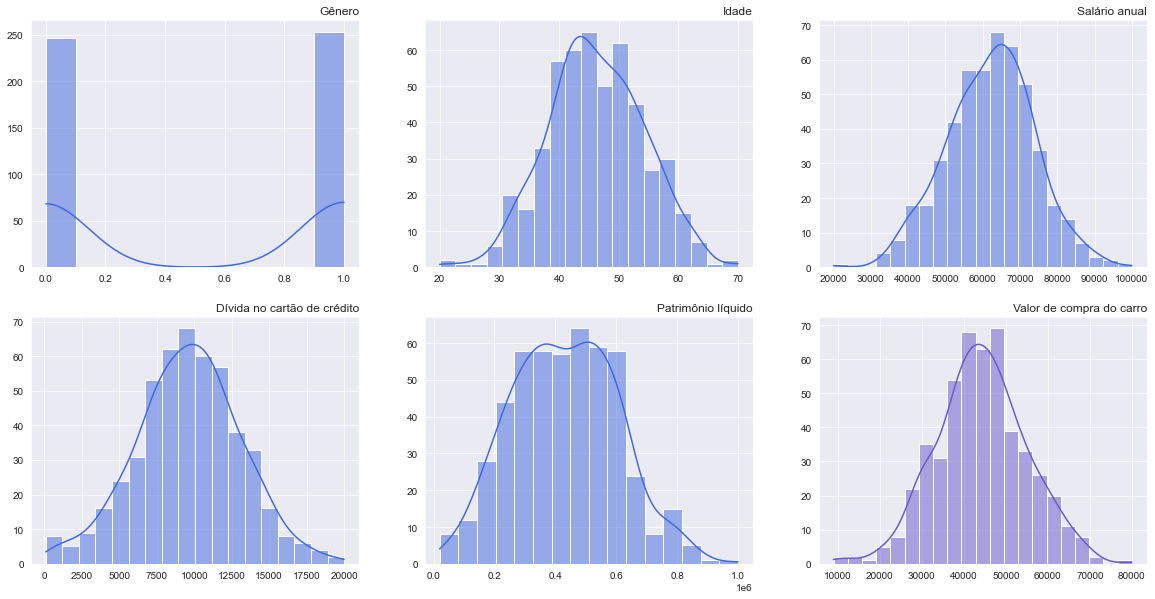

In [17]:
# Função para gerar gráficos histplot
# param1: nome do dataframe
# param2: variável do eixo X
# param3: axis
# param4: label para gráfico
# param5: cor, default: royalblue

def graf_histplot(param1, param2, param3, param4, param5='royalblue'):
    sns.histplot(data=param1, x=param2, ax=param3, color=param5, kde=True)
    param3.set(xlabel='', ylabel='')
    param3.tick_params(labelsize=10)
    param3.ticklabel_format(style='plain', axis='y')
    param3.set_title(param4, loc='right', fontsize=12)


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(
    nrows=2, ncols=3, figsize=(20, 10))

graf_histplot(df, 'genero', ax1, 'Gênero')
graf_histplot(df, 'idade', ax2, 'Idade')
graf_histplot(df, 'salario_anual', ax3, 'Salário anual')
graf_histplot(df, 'divida_cartao_credito', ax4,
                'Dívida no cartão de crédito')
graf_histplot(df, 'patrimonio_liquido', ax5, 'Patrimônio líquido')
graf_histplot(df, 'valor_compra_carro', ax6,
                'Valor de compra do carro', 'slateblue')

plt.show()


## 3. Correlação entre as variáveis


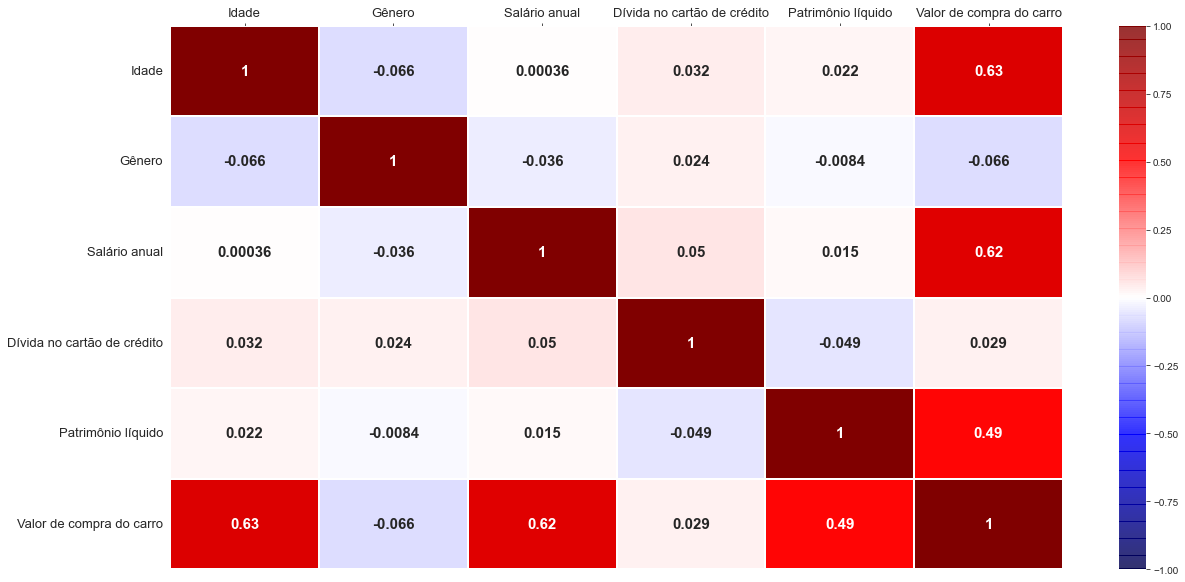

In [18]:
corr = df[['idade', 'genero', 'salario_anual', 'divida_cartao_credito',
           'patrimonio_liquido', 'valor_compra_carro']].corr()

plt.figure(figsize=(20, 10))
plot = sns.heatmap(data=corr,
                annot=True, annot_kws={'size': 15, 'fontweight': 'bold'}, 
                cbar_kws={'extendfrac': .1, 'drawedges': True},
                cmap='seismic', vmin=-1, linewidths=.2,
                xticklabels=['Idade', 'Gênero', 'Salário anual', 'Dívida no cartão de crédito',
                             'Patrimônio líquido', 'Valor de compra do carro'],
                yticklabels=['Idade', 'Gênero', 'Salário anual', 'Dívida no cartão de crédito',
                             'Patrimônio líquido', 'Valor de compra do carro']
                )
plot.set_yticklabels(plot.get_yticklabels(), rotation=0)
plot.tick_params(labelsize=13)
plot.xaxis.tick_top()
plt.show()


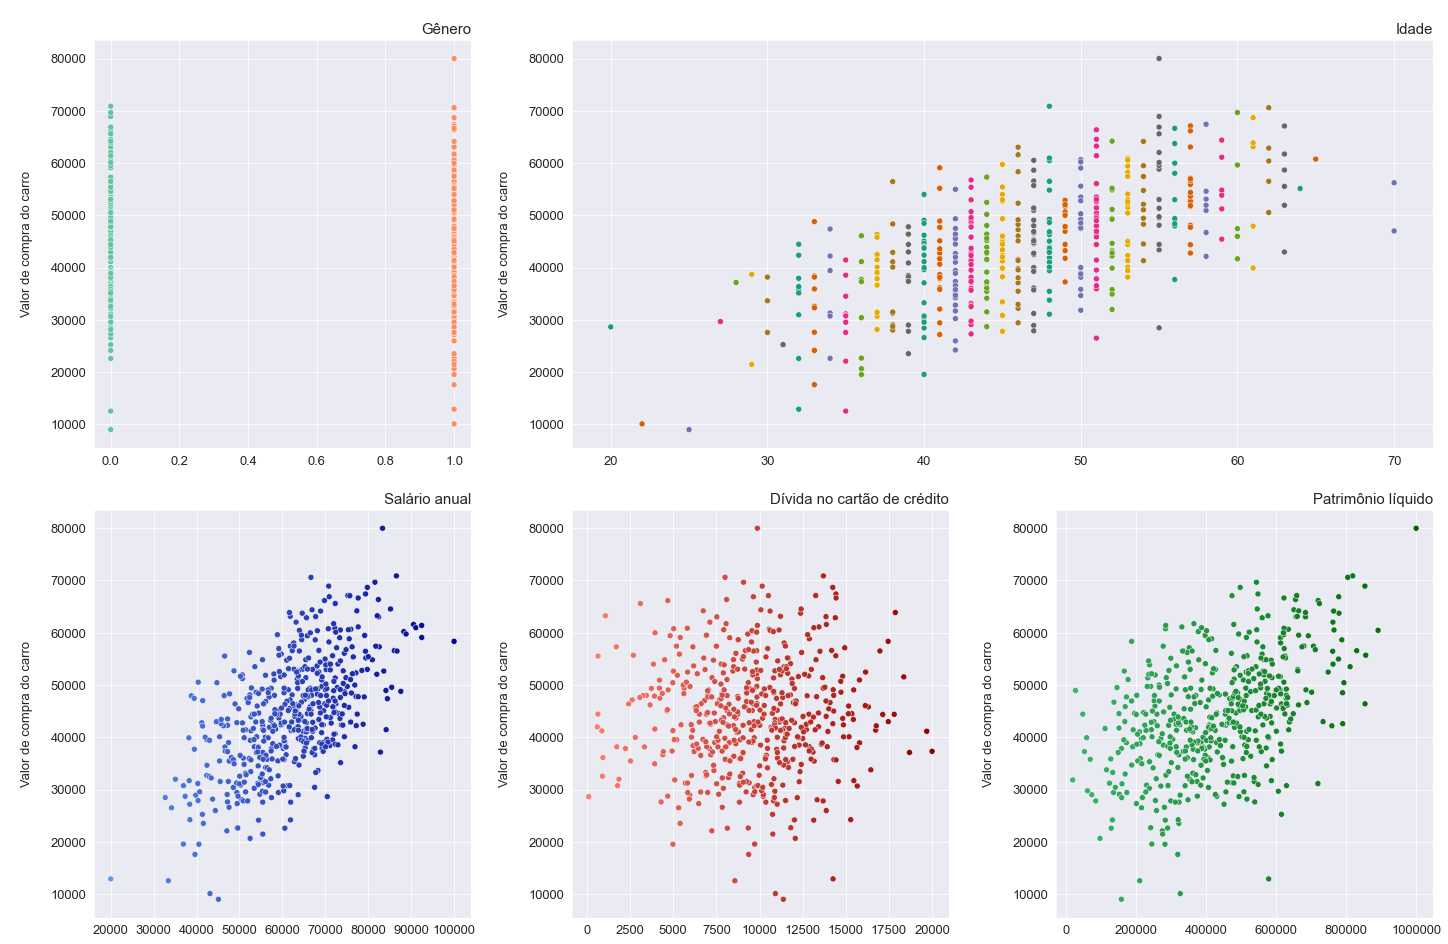

In [19]:
# Função para gerar gráficos scatterplot
# param1: dataframe
# param2: nome da variável independente
# param3: nome da variável dependente
# param4: nome do gráfico(coluna)
# param5: axis
# param6: spec
# param7: paleta de cores, default: Set2


def graf_scatterplot(param1, param2, param3, param4, param5, param6, param7='crest'):
    param5 = fig.add_subplot(param6)
    sns.scatterplot(data=param1, x=param2, y=param3,
                    ax=param5, hue=param2, palette=param7, legend=False)
    param5.set_ylabel('\nValor de compra do carro\n', fontsize=13)
    param5.set_xlabel('')
    param5.ticklabel_format(style='plain', axis='x')
    param5.tick_params(labelsize=13)
    param5.set_title(param4, loc='right', fontsize=15)


fig = plt.figure(figsize=(20, 13), constrained_layout=True)
spec = fig.add_gridspec(2, 3)

ax1 = ax2 = ax3 = ax4 = ax5 = None

graf_scatterplot(df, 'genero', 'valor_compra_carro', '\nGênero',
                 ax1, spec[0, 0], 'Set2')
graf_scatterplot(df, 'idade', 'valor_compra_carro', '\nIdade',
                 ax2, spec[0, 1:], 'Dark2')
graf_scatterplot(df, 'salario_anual', 'valor_compra_carro', '\nSalário anual',
                 ax3, spec[1, 0], sns.color_palette('blend:cornflowerblue,darkblue', as_cmap=True))
graf_scatterplot(df, 'divida_cartao_credito', 'valor_compra_carro', '\nDívida no cartão de crédito',
                 ax4, spec[1, 1], sns.color_palette('blend:salmon,darkred', as_cmap=True))
graf_scatterplot(df, 'patrimonio_liquido', 'valor_compra_carro', '\nPatrimônio líquido',
                 ax5, spec[1, 2], sns.color_palette('blend:mediumseagreen,darkgreen', as_cmap=True))

plt.show()


## 4. Criação do modelo de regressão linear múltipla


### 1. Separação dos dados de treino e teste


In [20]:

# features, variáveis independentes
X = df.drop(['valor_compra_carro'], axis=1)

# target, variável dependente
y = df['valor_compra_carro'].copy()

# definindo o percentual de dados para teste
perc = 0.3

# definindo o random_state
seed = 10

# separação dos dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=perc, random_state=seed)

print('\nQuantidade de dados divididos em treino e teste')
print('\nX_train:', X_train.shape)
print('y_train:', y_train.shape)
print('\nX_test:', X_test.shape)
print('y_test:', y_test.shape)



Quantidade de dados divididos em treino e teste

X_train: (350, 5)
y_train: (350,)

X_test: (150, 5)
y_test: (150,)


In [21]:
# definição do modelo a ser utilizado nos dados
modelo_rl = LinearRegression()
print('\nModelo selecionado:', modelo_rl)



Modelo selecionado: LinearRegression()


### 2. Treinamento do modelo


In [22]:
# treinamento do modelo
modelo_rl.fit(X_train, y_train)

# R-quadrado, coeficiente de determinação
print('\nMétrica do modelo com dados de treino')
print('\nR^2:', modelo_rl.score(X_train, y_train) * 100)
print('\n\nMétrica do modelo com dados de teste')
print('\nR^2:', modelo_rl.score(X_test, y_test) * 100)


Métrica do modelo com dados de treino

R^2: 99.9498795800886


Métrica do modelo com dados de teste

R^2: 99.9493284575772


### 3. Predições do modelo com dados de teste


In [23]:
# predição com dados de treino
pred_train = modelo_rl.predict(X_train)

# predição com dados de teste
pred_test = modelo_rl.predict(X_test)

pred_test


array([47753.00077419, 31127.79157041, 42378.59657607, 56400.54154805,
       38265.07708906, 51775.15779411, 36788.07767431, 48472.14446721,
       38582.37375459, 32930.46682965, 44835.25677079, 42537.16806336,
       42838.34275151, 41561.82012296, 44207.02280588, 29709.80243685,
       28058.964357  , 37686.02902456, 27579.31279978, 32429.61153715,
       43177.00960248, 35309.20851889, 34888.59265512, 47407.35450267,
       53042.06446135, 44128.09633443, 52897.79398387, 46678.02747381,
       55244.69219711, 46134.00854966, 44813.25308072, 45111.14757164,
       50023.13163258, 47102.78459425, 57700.57710908, 40987.5619209 ,
       56458.13106137, 42396.37424936, 35728.73294088, 51772.65859615,
       52496.71798904, 53614.17463177, 30197.75644972, 48476.67417212,
       45097.51130782, 51567.49752281, 70815.69951352, 52646.65920214,
       34461.10096636, 45367.7814134 , 34638.05820511, 42259.97142958,
       46349.27635696, 63589.22469021, 44445.44585846, 58745.33711089,
      

### 4. Resíduo, diferença entre dados de teste e dados previstos


In [24]:
print('\nAmostra das 10 primeiras linhas\n')

residuo = y_test - pred_test

df_comparativo = pd.DataFrame({
    "Dados de teste": y_test,
    "Dados previstos": pred_test,
    "Resíduo": residuo,
})

df_comparativo.head(10).sort_index()



Amostra das 10 primeiras linhas



,Dados de teste,Dados previstos,Resíduo
131,38243.66481,38265.077089,-21.412279
151,47604.34591,47753.000774,-148.654864
154,42369.64247,42378.596576,-8.954106
157,38172.83602,38582.373755,-409.537735
190,56579.90338,56400.541548,179.361832
266,37076.82508,36788.077674,288.747406
282,32828.03477,32930.466830,-102.432060
310,51866.48719,51775.157794,91.329396
424,31408.62631,31127.791570,280.834740
495,48901.44342,48472.144467,429.298953


In [25]:
print('\nMédia do resíduo:', residuo.mean())
print('\nDesvio padrão do resíduo:', residuo.std())


Média do resíduo: 25.728678418401614

Desvio padrão do resíduo: 239.90097924248718


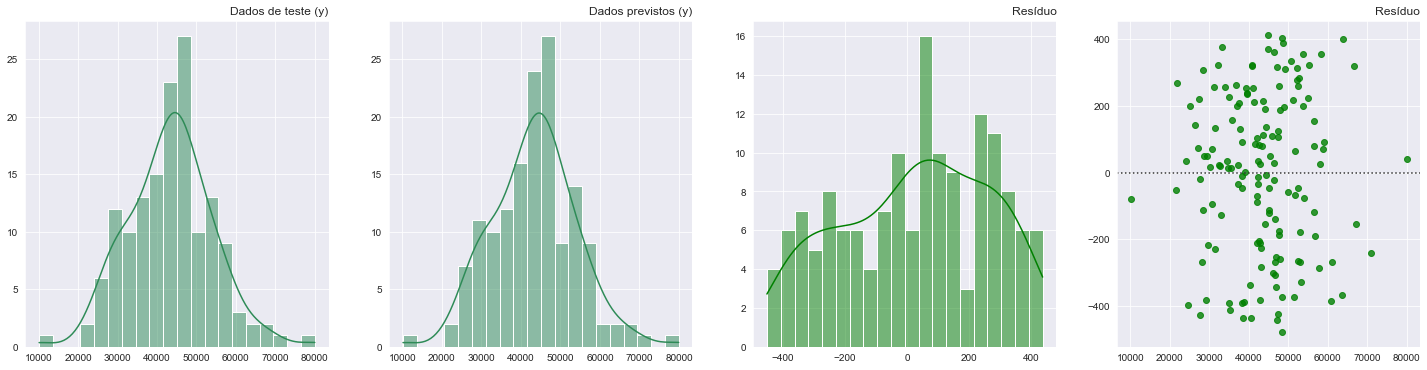

In [26]:
# Função para gerar gráficos histplot
# param1: conjunto de dados
# param2: número de bins
# param3: axis
# param4: label para gráfico
# param5: cor, default: seagreen

def graf_3_histplot(param1, param2, param3, param4, param5='seagreen'):
    sns.histplot(data=param1, bins=param2, ax=param3, color=param5, kde=True)
    param3.set(xlabel='', ylabel='')
    param3.tick_params(labelsize=10)
    param3.ticklabel_format(style='plain', axis='y')
    param3.set_title(param4, loc='right', fontsize=12)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(
    nrows=1, ncols=4, figsize=(25, 6))

graf_3_histplot(y_test, 20, ax1, 'Dados de teste (y)')
graf_3_histplot(pred_test, 20, ax2, 'Dados previstos (y)')
graf_3_histplot(residuo, 20, ax3, 'Resíduo', 'green')

sns.residplot(y=residuo, x=pred_test, color='green', ax=ax4)
ax4.set(xlabel='', ylabel='')
ax4.tick_params(labelsize=10)
ax4.ticklabel_format(style='plain', axis='y')
ax4.set_title('Resíduo', loc='right', fontsize=12)

plt.show()


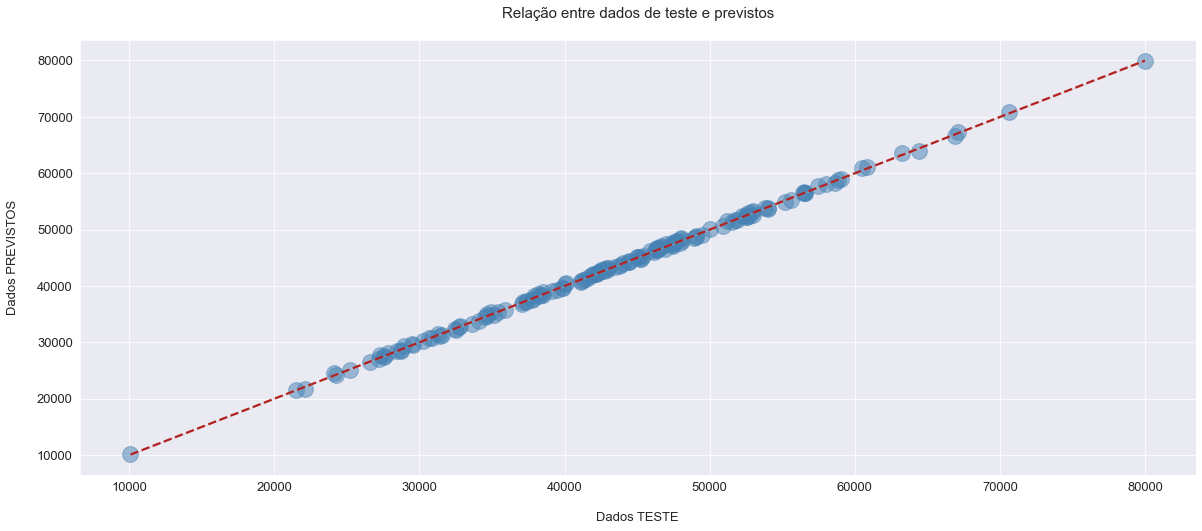

In [27]:
plt.figure(figsize=(20, 8))
plot = sns.regplot(x=y_test, y=pred_test, scatter_kws={
                   'color': 'steelblue', 's': 250, 'alpha': .5}, line_kws={'color': 'firebrick', 'linestyle': 'dashed'})
plot.set_ylabel('Dados PREVISTOS\n', fontsize=13)
plot.set_xlabel('\nDados TESTE', fontsize=13)
plot.ticklabel_format(style='plain', axis='x')
plot.tick_params(labelsize=13)
plot.set_title('Relação entre dados de teste e previstos\n',
               loc='center', fontsize=15)
plt.show()


### 5. Métricas de performance


In [28]:
# definindo os valores dos hiperparâmetros

# definindo o número de folds, número de divisões dos dados
numero_folds = 5

# definindo o random_state
seed = 5

# separando os dados em folds
kfold = KFold(n_splits=numero_folds, shuffle=True, random_state=seed)

# array de score de cada fold
resultado = cross_val_score(modelo_rl, X, y, cv=kfold)

print('\nMétrica do modelo utilizando Cross Validation')
print('\nScore de cada fold:', resultado * 100)
print('\nScore (média):', resultado.mean() * 100)


Métrica do modelo utilizando Cross Validation

Score de cada fold: [99.94278704 99.95721642 99.95261622 99.94367984 99.94506696]

Score (média): 99.94827329497944


In [29]:
# Função para gerar metricas do modelo
# param1: dados da variável dependente, target
# param2: dados de predição


def metricas(param1, param2):
    arr = []
    # R-Quadrado, ou Coeficiente de Determinação (R2)
    arr.append(r2_score(param1, param2) * 100)
    # Erro Quadrático Médio (MSE)
    arr.append(mean_squared_error(param1, param2))
    # Raiz do erro quadrático médio (RMSE)
    arr.append(mean_squared_error(param1, param2, squared=False))
    # Erro Absoluto Médio (MAE)
    arr.append(mean_absolute_error(param1, param2))
    # Erro Percentual Absoluto Médio (MAPE)
    arr.append(mean_absolute_percentage_error(param1, param2) * 100)
    # Raiz do erro médio quadrático e logarítmico (RMSLE)
    arr.append(mean_squared_log_error(param1, param2))
    return arr


data = {
    '': ['R^2', 'MSE', 'RMSE', 'MAE', 'MAPE', 'RMSLE'],
    'TREINO': [i for i in metricas(y_train, pred_train)],
    'TESTE': [i for i in metricas(y_test, pred_test)],
}

print(tabulate(data, headers='keys', tablefmt='fancy_grid',
               floatfmt=('', '.8f', '.8f')))


╒═══════╤════════════════╤════════════════╕
│       │         TREINO │          TESTE │
╞═══════╪════════════════╪════════════════╡
│ R^2   │    99.94987958 │    99.94932846 │
├───────┼────────────────┼────────────────┤
│ MSE   │ 58201.37959906 │ 57830.76153572 │
├───────┼────────────────┼────────────────┤
│ RMSE  │   241.24962093 │   240.48027265 │
├───────┼────────────────┼────────────────┤
│ MAE   │   208.54494825 │   204.16848159 │
├───────┼────────────────┼────────────────┤
│ MAPE  │     0.50785721 │     0.49058039 │
├───────┼────────────────┼────────────────┤
│ RMSLE │     0.00003847 │     0.00003496 │
╘═══════╧════════════════╧════════════════╛


### 6. Previsões com novos dados


In [30]:
# Função para testar o modelo com novos dados
# param1: quantidade de entradas de novos dados

def teste_modelo(param1):
    arrx = []
    for i in range(param1):
        genero = np.random.randint(0, 2)
        idade = np.random.randint(
            df['idade'].min(), df['idade'].max())
        salario_anual = np.random.randint(
            df['salario_anual'].min(), df['salario_anual'].max())
        divida_cartao_credito = np.random.randint(
            df['divida_cartao_credito'].min(), df['divida_cartao_credito'].max())
        patrimonio_liquido = np.random.randint(
            df['patrimonio_liquido'].min(), df['patrimonio_liquido'].max())

        arr = np.array([genero, idade, salario_anual,
                        divida_cartao_credito, patrimonio_liquido])
        arr = arr.reshape(1, -1)
        arr = np.append(arr, modelo_rl.predict(arr))
        arr = arr.reshape(1, -1)
        arrt = arr.T

        arrx.append(arrt)

    print(tabulate(arrx, headers=['genero', 'idade', 'salario_anual', 
                        'divida_cartao_credito', 'patrimonio_liquido', 
                        'valor_compra_carro\nPrevisão do modelo'], 
                    tablefmt='fancy_grid',
                    floatfmt=('.0f', '.0f', '.2f', '.2f', '.2f', '.5f')))


teste_modelo(5)


╒══════════╤═════════╤═════════════════╤═════════════════════════╤══════════════════════╤══════════════════════╕
│   genero │   idade │   salario_anual │   divida_cartao_credito │   patrimonio_liquido │   valor_compra_carro │
│          │         │                 │                         │                      │   Previsão do modelo │
╞══════════╪═════════╪═════════════════╪═════════════════════════╪══════════════════════╪══════════════════════╡
│        1 │      56 │        81426.00 │                13871.00 │             91654.00 │          53503.58961 │
├──────────┼─────────┼─────────────────┼─────────────────────────┼──────────────────────┼──────────────────────┤
│        1 │      49 │        91532.00 │                19172.00 │            641177.00 │          69183.52039 │
├──────────┼─────────┼─────────────────┼─────────────────────────┼──────────────────────┼──────────────────────┤
│        1 │      41 │        54255.00 │                11721.00 │            941576.00 │       